In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(0)


# Creating the dataset
np.random.seed(0)  # For reproducibility
X = np.random.rand(100, 1) * 10 - 3  # Random values shifted by -3

# Quadratic relationship with noise
# y = 0.5 * x^2 + 1.5 * x + 2 + noise
noise = np.random.randn(100, 1)
Y = 0.5 * X**2 + 1.5 * X + 2 + noise


<Axes: >

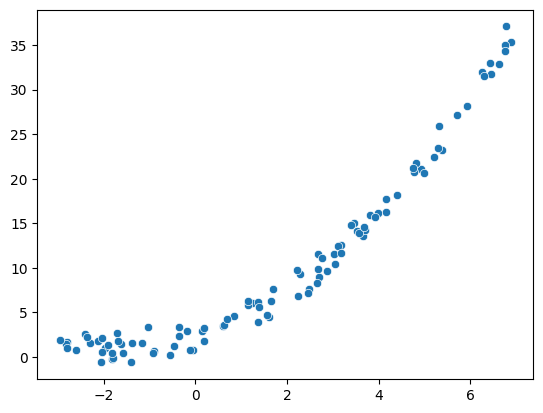

In [3]:
sns.scatterplot(x=X.flatten(), y=Y.flatten())

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state= 42, test_size= 0.25)

In [5]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
y_pred = LR.predict(x_train)

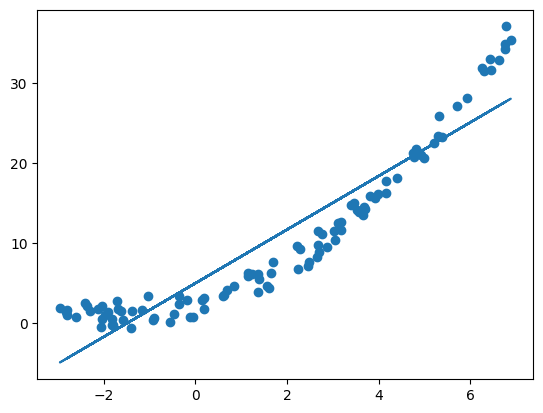

In [7]:
plt.scatter(x=X, y=Y)
plt.plot(x_train, y_pred)

In [8]:
from sklearn.metrics import r2_score

score = r2_score(y_true=y_test, y_pred=LR.predict(x_test))
print(score)

0.8553475198796354


In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [10]:
Poly_model = LinearRegression()

Poly_model.fit(x_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


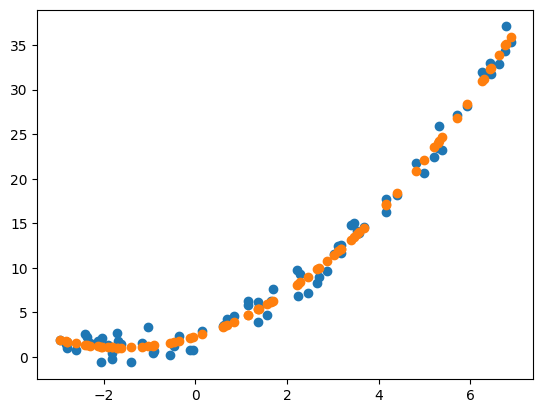

In [11]:
plt.scatter(x = x_train, y = y_train)
plt.scatter(x = x_train, y = Poly_model.predict(x_train_poly))

In [12]:
Poly_model.predict(poly.transform([[100]]))

array([[4992.77878628]])

In [13]:
from sklearn.pipeline import Pipeline

In [37]:
def poly_regression(degree):
    x_new = np.linspace(-5,6,200).reshape(200,1)
    
    poly_pipeline = Pipeline(
        [
            ('poly_feature',PolynomialFeatures(degree=degree, include_bias=True)),
            ('lin_reg',LinearRegression())
        ]
    )
    
    poly_pipeline.fit(x_train,y_train)
    
    y_pred = poly_pipeline.predict(x_new)
    
    plt.scatter(x_train, y_train)
    plt.scatter(x_new, y_pred)
    

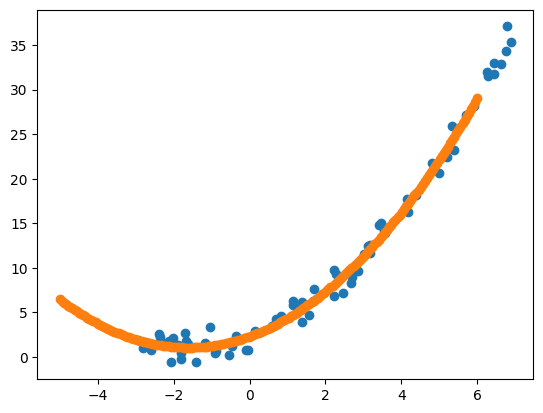

In [41]:
poly_regression(3)